<a href="https://colab.research.google.com/github/Anuubhavvvv/Project-Python/blob/main/Titanic_Survival_Classification_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th><th>Key</th></tr>
<tr><td>survival</td><td> Survival </td><td>0 = No, 1 = Yes</td></tr>
<tr><td>pclass</td> <td>Ticket class</td><td>1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
<tr><td>name </td><td>Passenger Name	</td></tr>
<tr><td>sex </td><td>Sex 	</td></tr>
<tr><td>Age </td><td>Age in years 	</td></tr>
<tr><td>sibsp </td><td>Number of siblings / spouses aboard the Titanic</td></tr>
<tr><td>parch </td><td>Number of parents / children aboard the Titanic</td></tr>
<tr><td>ticket </td><td>Ticket number</td></tr>
<tr><td>fare </td><td>Passenger fare </td></tr>
<tr><td>cabin </td><td>Cabin number </td></tr>
<tr><td>embarked </td><td>Port of Embarkation</td><td> C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>

#### Titanic dataset Survival Classification

1) Read the dataset<br>
2) Remove/handle null values<br>
3) Depict Survived column count on a countplot<br>
4) Depict Survived column count based on Sex on a countplot<br>
5) Depict Survived column count based on Pclass on a countplot<br>
6) Depict quartile distribution of Age column for each of Pclass categories<br>
7) Encode categorical varibles if any<br>
8) Select appropriate features and generate independent variables keeping 'Survived' column as dependent variable<br>
9) Split the dataset into training and testing data with test_size=25%<br>
10) Apply Logistic Regression and generate the predicted values for the test data<br>
11) Compute training and testing accuracy<br>
12) Generate confusion matrix. Also represnet it on heatmap<br>
13) Generate classifictaion_report<br>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/titanic.csv')

In [8]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('U',inplace=True)
df['Embarked'].fillna('S',inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


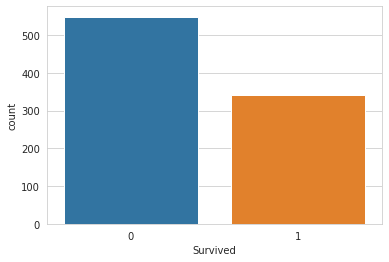

In [11]:
sns.countplot(df['Survived'])
plt.show()

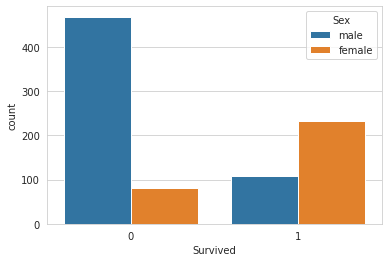

In [13]:
sns.countplot(x=df['Survived'],hue=df['Sex'])
plt.show()

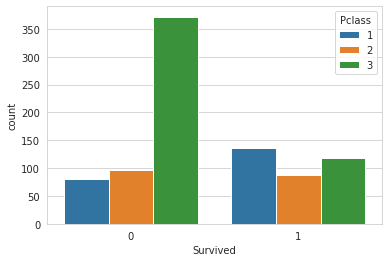

In [12]:
sns.countplot(x=df['Survived'],hue=df['Pclass'])
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df['Name']=le.fit_transform(df['Name'])
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Cabin']=le.fit_transform(df['Cabin'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
x=df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

In [22]:
y=df['Survived']

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
LR=LogisticRegression()

In [27]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred=LR.predict(x_test)

In [29]:
print(LR.score(x_train,y_train))
print(LR.score(x_test,y_test))

0.7879213483146067
0.7932960893854749


In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       120
           1       0.67      0.75      0.70        59

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.80      0.79      0.80       179



In [33]:
print(confusion_matrix(y_test,y_pred))

[[98 15]
 [22 44]]
